# Assignment No-07-Clustering

# AIRLINES DataSet

In [1]:
#Importing the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [3]:
#Import Data

In [4]:
airline=pd.read_csv("D:\ExcelR Solution\Data Science\Assignments\Assignment No 7 Clustering\EastWestAirlines.csv")

In [5]:
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [6]:
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [7]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [8]:
airline.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [9]:
airline2 = airline.drop(["ID#"],axis=1)

In [10]:
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [11]:
#NORMALIZATION FUNCTION

In [12]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [13]:
#Normalized data frame (considering the numerical part of data)

In [14]:
airline2_norm = norm_func(airline2)

In [15]:
airline2_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [16]:
#CREATING DENDROGRAM 

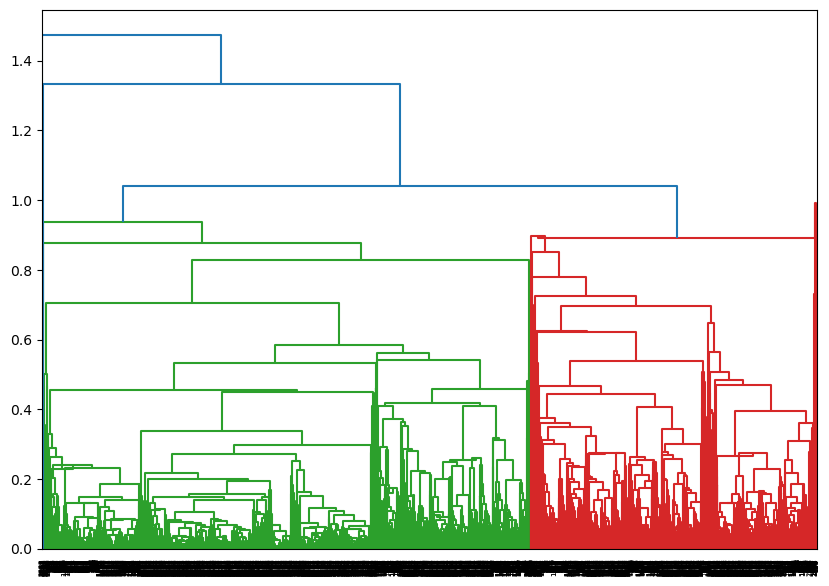

In [17]:
plt.figure(figsize=(10,7))
dendrograms = sch.dendrogram(sch.linkage(airline2_norm,method='centroid'),labels=airline['ID#'].values)

In [18]:
#Create Clusters

In [19]:
airlines_clusters = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

In [20]:
airlines_clusters

AgglomerativeClustering(n_clusters=5)

In [21]:
Y =pd.DataFrame(airlines_clusters.fit_predict(airline2_norm),columns=['clustersid'])
Y['clustersid'].value_counts()

1    1011
0     946
2     808
4     699
3     535
Name: clustersid, dtype: int64

In [22]:
# Adding clusters to dataset

In [23]:
airline2['clustersid'] = airlines_clusters.labels_

In [24]:
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,4


In [25]:
airline2.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,79848.233615,285.097252,1.699789,1.024313,1.000000,12079.774841,12.133192,781.939746,2.369979,4372.173362,1.0
1,1,43313.653808,21.506429,1.000000,1.033630,1.000989,2562.614243,5.474777,169.510386,0.523244,4940.680514,0.0
2,2,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0.0
3,3,127475.028037,160.801869,4.362617,1.000000,1.050467,58656.919626,22.235514,991.110280,3.005607,5072.226168,1.0
4,4,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0.0


In [26]:
#Plot Clusters

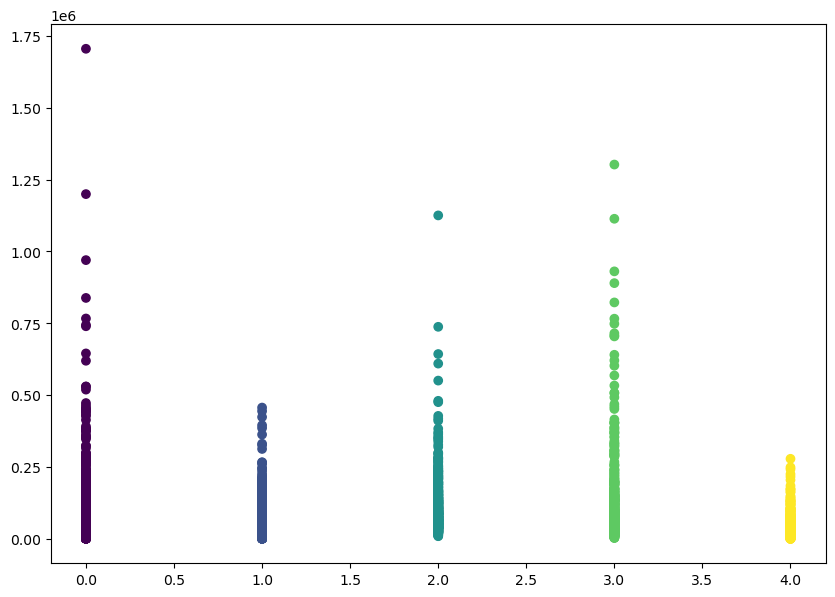

In [27]:
plt.figure(figsize=(10,7))
plt.scatter(airline2['clustersid'],airline2['Balance'],c=airlines_clusters.labels_)

# K-Means Clustering

In [28]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [29]:
# Normalize heterogenous numerical data by using Standard Scaler
airline2_norm=StandardScaler().fit_transform(airline2)
airline2_norm

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.39545434e+00, -7.66919299e-01, -5.39219215e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.37995704e+00, -7.66919299e-01, -5.39219215e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.41192021e+00, -7.66919299e-01, -5.39219215e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -1.31560393e+00,  1.30391816e+00, -1.25111675e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31608822e+00, -7.66919299e-01,  1.59647340e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31754109e+00, -7.66919299e-01,  1.59647340e+00]])

In [30]:
# within-cluster sum-of-squares criterion 
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(airline2_norm)
    wcss.append(kmeans.inertia_)

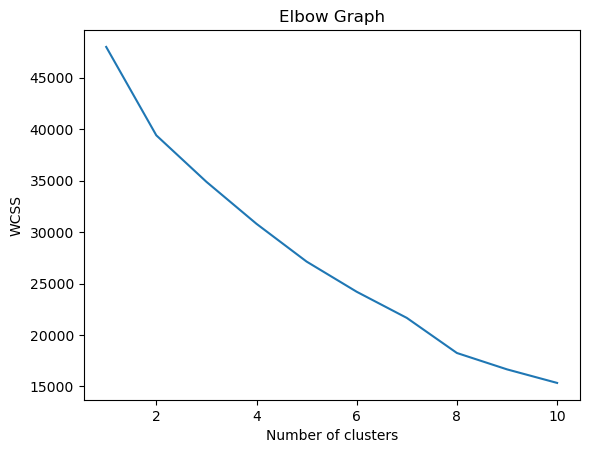

In [31]:
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Build Cluster algorithm using K=3

In [32]:
# Cluster algorithm using K=3
clusters3=KMeans(3,random_state=30).fit(airline2_norm)
clusters3

KMeans(n_clusters=3, random_state=30)

In [33]:
clusters3.labels_

array([0, 0, 0, ..., 2, 0, 0])

In [34]:
#assign  clustering to the data set

In [35]:
airline3=airline2.copy()

In [36]:
airline3['clusters3id']=clusters3.labels_

In [37]:
airline3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid,clusters3id
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,4,0


In [38]:
# Compute the centroids for K=3 clusters with 11 variables
clusters3.cluster_centers_

array([[-0.28807922, -0.05712135, -0.59141187,  0.02936551, -0.06079714,
        -0.50666753, -0.47142699, -0.1850507 , -0.19662993, -0.19444552,
        -0.32822978, -0.03423999],
       [ 1.22381232,  0.81712507,  0.06985578,  0.1451213 ,  0.09060233,
         0.59771352,  1.60477999,  3.50200492,  3.76647147,  0.2900888 ,
         0.90711098, -0.13424756],
       [ 0.44266238,  0.00983975,  1.24012701, -0.08173431,  0.11616796,
         0.98945905,  0.77837803, -0.08409256, -0.09550471,  0.37149307,
         0.57046151,  0.09055854]])

In [39]:
# Group data by Clusters (K=4)
airline3.groupby('clusters3id').agg(['mean']).reset_index()

,clusters3id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,44588.892390,101.822444,1.245580,1.018832,1.000384,4913.910453,7.078401,201.343198,0.629131,3718.609531,0.211760,1.709454
1,1,196916.407186,776.215569,2.155689,1.035928,1.029940,31578.401198,27.011976,5362.982036,15.658683,4717.556886,0.808383,1.568862
2,2,118232.821951,147.759350,3.768293,1.002439,1.034959,41059.066667,19.078862,341.666667,1.008943,4883.304878,0.646341,1.884553


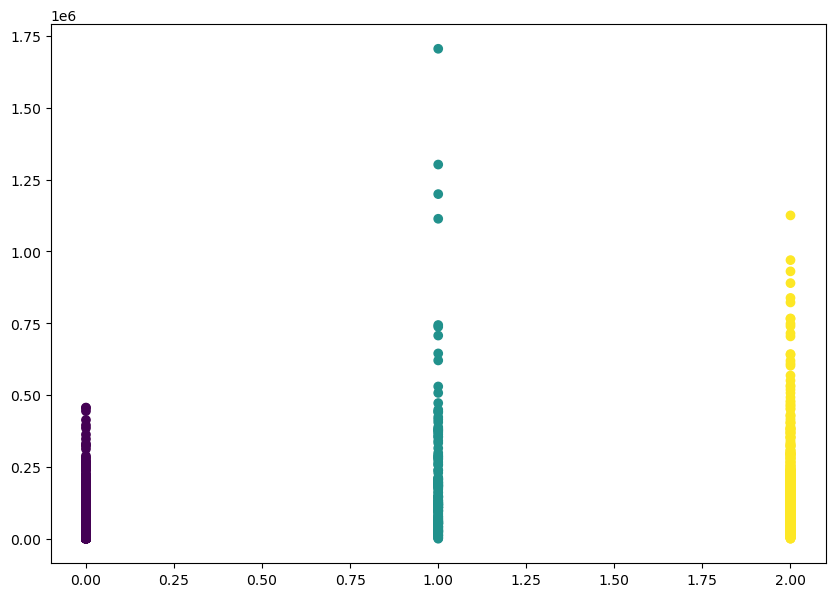

In [40]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airline3['clusters3id'],airline3['Balance'], c=clusters3.labels_)

# DBSCAN

In [41]:
from sklearn.cluster import DBSCAN

In [42]:
# Normalize heterogenous numerical data using standard scalar fit transform to dataset
airline2_norm=StandardScaler().fit_transform(airline2)
airline2_norm

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.39545434e+00, -7.66919299e-01, -5.39219215e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.37995704e+00, -7.66919299e-01, -5.39219215e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.41192021e+00, -7.66919299e-01, -5.39219215e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -1.31560393e+00,  1.30391816e+00, -1.25111675e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31608822e+00, -7.66919299e-01,  1.59647340e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31754109e+00, -7.66919299e-01,  1.59647340e+00]])

In [43]:
# DBSCAN Clustering
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(airline2_norm)

DBSCAN(eps=1, min_samples=4)

In [44]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 3, 5, 5], dtype=int64)

In [45]:
# Adding clusters to dataset
airline3['clusters']=dbscan.labels_
airline3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid,clusters3id,clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,0,3
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,0,3
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,2,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,4,0,5


In [46]:
airline3.groupby('clusters').agg(['mean']).reset_index()

,clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid,clusters3id
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,182850.214153,975.923650,2.761639,1.057728,1.091248,40711.610801,22.664804,2234.273743,6.465549,4763.499069,0.703911,1.668529,1.277467
1,0,41399.339896,7.276684,1.000000,1.000000,1.000000,2236.538860,5.188601,138.135751,0.455959,4949.827979,0.000000,1.000000,0.002073
2,1,83457.605042,4.201681,4.327731,1.000000,1.000000,48581.319328,18.184874,254.591036,0.750700,5040.946779,1.000000,3.000000,2.000000
3,2,95527.066478,2.304102,3.169731,1.000000,1.000000,24568.350778,15.415842,95.256011,0.268741,4342.182461,0.000000,2.000000,1.026874
4,3,51799.387314,12.476383,1.755735,1.000000,1.000000,10605.232119,10.298246,304.823212,0.991903,4255.739541,1.000000,0.000000,0.657220
5,4,34806.538462,0.000000,1.000000,2.000000,1.000000,8389.769231,12.000000,19.230769,0.153846,3186.153846,0.000000,1.000000,0.000000
6,5,27620.401527,4.900763,1.000000,1.000000,1.000000,2395.732824,5.825954,171.951145,0.549618,1519.085496,0.000000,4.000000,0.009160
7,6,202750.000000,0.000000,4.000000,1.000000,1.000000,43155.666667,20.333333,2456.666667,4.666667,4447.333333,0.000000,2.000000,2.000000
8,7,36413.428571,0.000000,1.000000,3.000000,1.000000,14341.142857,13.857143,57.142857,0.285714,3537.285714,0.000000,1.000000,0.000000


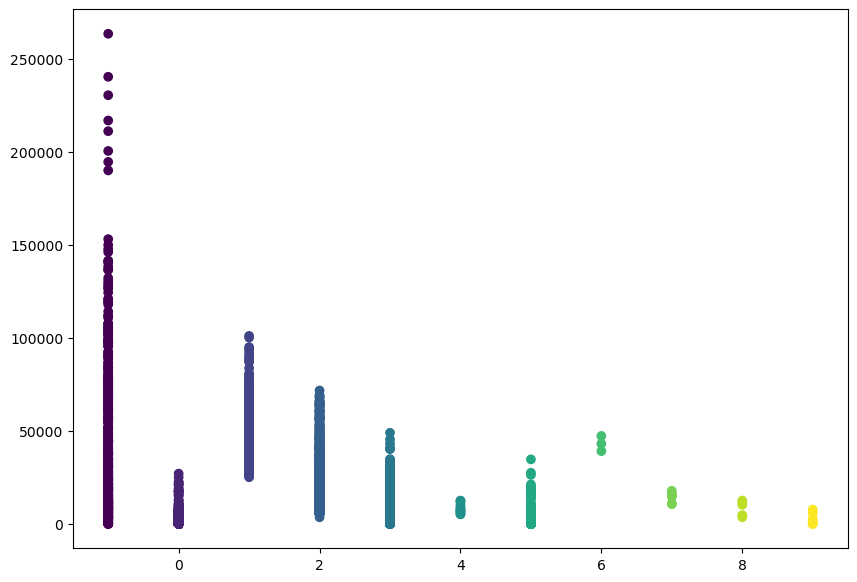

In [47]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airline3['clusters'],airline3['Bonus_miles'], c=dbscan.labels_) 

# CRIME DataSet

In [48]:
#Importing the Libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [50]:
#Import Data

In [51]:
crime= pd.read_csv("D:\ExcelR Solution\Data Science\Assignments\Assignment No 7 Clustering\crime_data.csv")

In [52]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [53]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [54]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [55]:
crime2=crime.drop(['Unnamed: 0'],axis=1)

In [56]:
crime2.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [57]:
# Normalize heterogenous numerical data using standard scalar fit transform to dataset
crime2_norm=StandardScaler().fit_transform(crime2)
crime2_norm

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [58]:
# DBSCAN Clustering
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(crime2_norm)

DBSCAN(eps=1, min_samples=4)

In [59]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [60]:
# Adding clusters to dataset
crime2['clusters']=dbscan.labels_
crime2

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [61]:
crime2.groupby('clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667
1,0,14.050000,238.000000,57.750000,23.200000
2,1,4.825000,112.035714,63.357143,16.107143


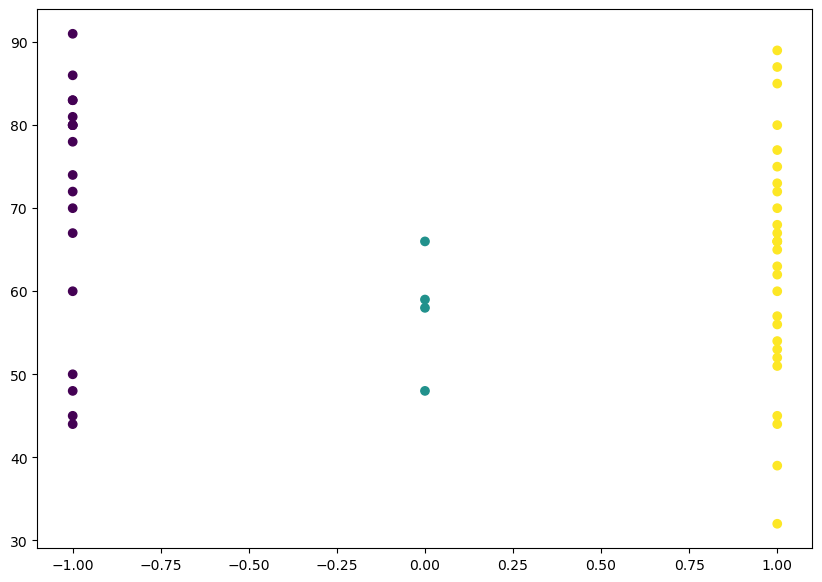

In [62]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime2['clusters'],crime2['UrbanPop'], c=dbscan.labels_) 

In [63]:
#NORMALIZATION FUNCTION

In [64]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)

In [65]:
#Normalized data Frame ( Considering the numerical part of data )

In [66]:
crime_data_norm = norm_func(crime2)

In [67]:
crime_data_norm

,Murder,Assault,UrbanPop,Rape,clusters
0,0.746988,0.654110,0.440678,0.359173,0.5
1,0.554217,0.746575,0.271186,0.961240,0.0
2,0.439759,0.852740,0.813559,0.612403,0.0
3,0.481928,0.496575,0.305085,0.315245,0.0
4,0.493976,0.791096,1.000000,0.860465,0.0
5,0.427711,0.544521,0.779661,0.811370,0.0
6,0.150602,0.222603,0.762712,0.098191,1.0
7,0.307229,0.660959,0.677966,0.219638,0.0
8,0.879518,0.993151,0.813559,0.635659,0.0
9,1.000000,0.568493,0.474576,0.478036,0.0


In [68]:
#Create Dendogram

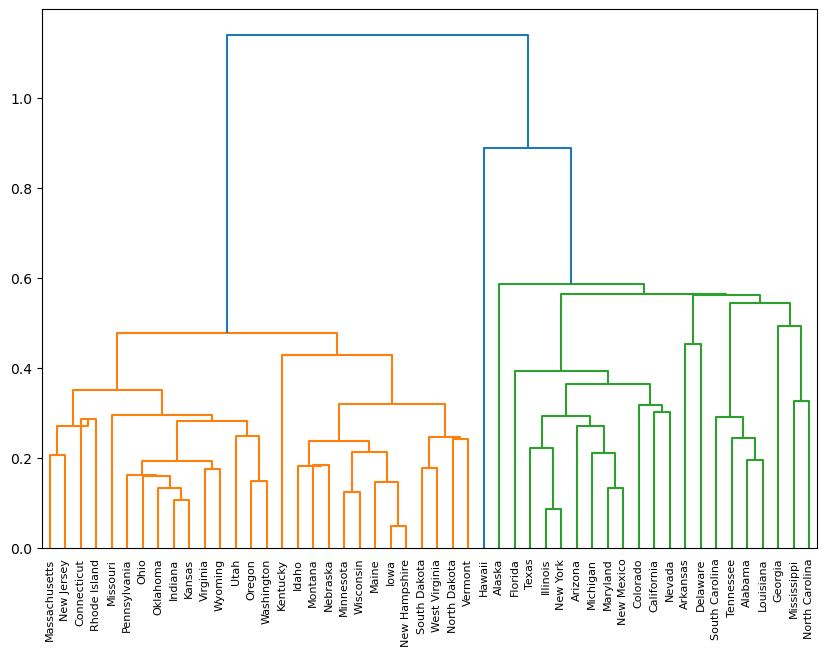

In [69]:
plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(crime_data_norm,method='centroid'),labels=crime['Unnamed: 0'].values)

In [70]:
#Create Clusters

In [71]:
crime_cluster = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='single')

In [72]:
crime_cluster

AgglomerativeClustering(linkage='single', n_clusters=5)

In [73]:
#Save clusters for chart

In [74]:
y = pd.DataFrame(crime_cluster.fit_predict(crime_data_norm),columns=['clustersid'])
y['clustersid'].value_counts()

2    28
0    16
1     4
4     1
3     1
Name: clustersid, dtype: int64

In [75]:
# Adding clusters to dataset

In [76]:
crime2['clustersid'] = crime_cluster.labels_

In [77]:
crime2

,Murder,Assault,UrbanPop,Rape,clusters,clustersid
0,13.2,236,58,21.2,0,1
1,10.0,263,48,44.5,-1,4
2,8.1,294,80,31.0,-1,0
3,8.8,190,50,19.5,-1,0
4,9.0,276,91,40.6,-1,0
5,7.9,204,78,38.7,-1,0
6,3.3,110,77,11.1,1,2
7,5.9,238,72,15.8,-1,0
8,15.4,335,80,31.9,-1,0
9,17.4,211,60,25.8,-1,0


In [78]:
crime2.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,Murder,Assault,UrbanPop,Rape,clusters
,,mean,mean,mean,mean,mean
0,0,11.425,258.750000,71.312500,28.318750,-1.0
1,1,14.050,238.000000,57.750000,23.200000,0.0
2,2,4.825,112.035714,63.357143,16.107143,1.0
3,3,5.300,46.000000,83.000000,20.200000,-1.0
4,4,10.000,263.000000,48.000000,44.500000,-1.0


In [79]:
#Plot Clusters

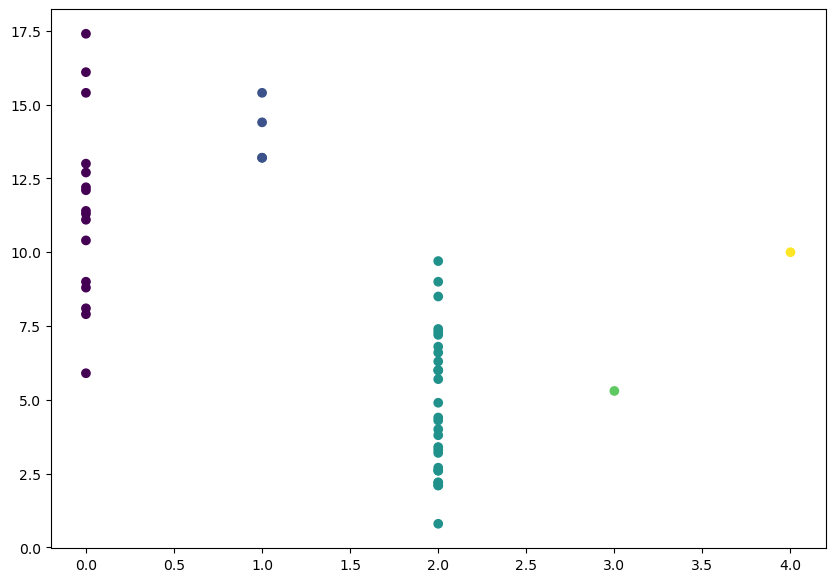

In [80]:
plt.figure(figsize=(10,7))
plt.scatter(crime2['clustersid'],crime2['Murder'],c=crime_cluster.labels_)

# DBSCAN

In [81]:
# DBSCAN Clustering
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(crime2_norm)

DBSCAN(eps=1, min_samples=4)

In [82]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [83]:
# Adding clusters to dataset
crime2['clusters']=dbscan.labels_
crime2

,Murder,Assault,UrbanPop,Rape,clusters,clustersid
0,13.2,236,58,21.2,0,1
1,10.0,263,48,44.5,-1,4
2,8.1,294,80,31.0,-1,0
3,8.8,190,50,19.5,-1,0
4,9.0,276,91,40.6,-1,0
5,7.9,204,78,38.7,-1,0
6,3.3,110,77,11.1,1,2
7,5.9,238,72,15.8,-1,0
8,15.4,335,80,31.9,-1,0
9,17.4,211,60,25.8,-1,0


In [84]:
crime2.groupby('clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape,clustersid
,,mean,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667,0.388889
1,0,14.050000,238.000000,57.750000,23.200000,1.000000
2,1,4.825000,112.035714,63.357143,16.107143,2.000000


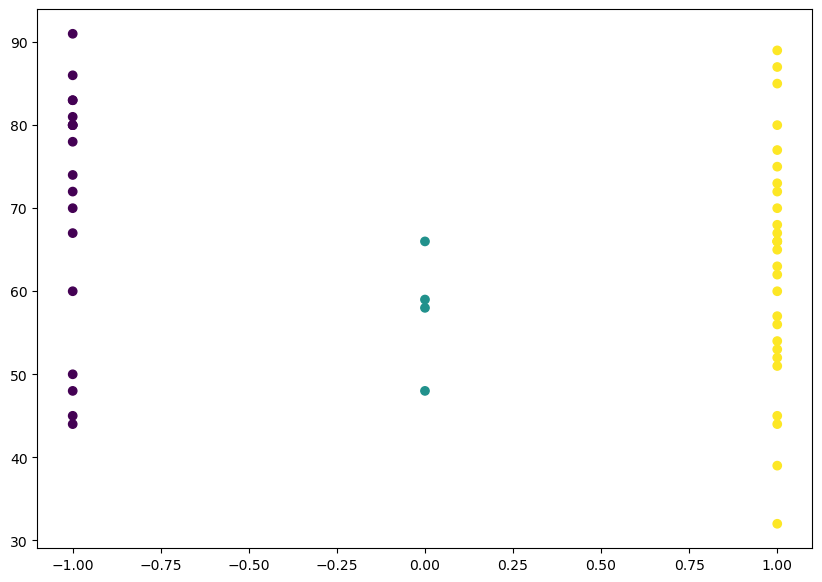

In [85]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime2['clusters'],crime2['UrbanPop'], c=dbscan.labels_) 

# Thank You